In [1]:
!dir C:\SimplonIA\projet1_e_commerce\raw_data

 Le volume dans le lecteur C s'appelle Windows
 Le num‚ro de s‚rie du volume est 5A52-AD0E

 R‚pertoire de C:\SimplonIA\projet1_e_commerce\raw_data

01/11/2020  15:48    <DIR>          .
01/11/2020  15:48    <DIR>          ..
11/10/2019  21:24           171ÿ352 olist_closed_deals_dataset.csv
06/10/2019  20:27         9ÿ033ÿ957 olist_customers_dataset.csv
27/08/2020  08:00         4ÿ756ÿ170 olist_customers_dataset.zip
06/10/2019  20:27        61ÿ273ÿ883 olist_geolocation_dataset.csv
27/08/2020  08:00        15ÿ179ÿ064 olist_geolocation_dataset.zip
11/10/2019  21:24           703ÿ836 olist_marketing_qualified_leads_dataset.csv
06/10/2019  20:27        17ÿ654ÿ914 olist_orders_dataset.csv
27/08/2020  08:00         6ÿ962ÿ019 olist_orders_dataset.zip
06/10/2019  20:27        15ÿ438ÿ671 olist_order_items_dataset.csv
27/08/2020  08:00         6ÿ589ÿ979 olist_order_items_dataset.zip
06/10/2019  20:27         5ÿ777ÿ138 olist_order_payments_dataset.csv
27/08/2020  08:00         2ÿ565ÿ951 olist_or

In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np


In [3]:
df_orders = pd.read_csv(r'C:\SimplonIA\projet1_e_commerce\raw_data\olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 
                                                                                                      'order_approved_at', 
                                                                                                      'order_delivered_carrier_date',
                                                                                                      'order_delivered_customer_date', 
                                                                                                      'order_estimated_delivery_date'] )

In [4]:
df_reviews = pd.read_csv(r'C:\SimplonIA\projet1_e_commerce\raw_data\olist_order_reviews_dataset.csv' )

In [5]:
df_orders['difference'] =( df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date'] ).dt.days


In [6]:
df1 = df_orders[['difference', 'order_estimated_delivery_date', 'order_delivered_customer_date','order_status', 'order_id' ]]

df1.head(1)

,difference,order_estimated_delivery_date,order_delivered_customer_date,order_status,order_id
0,7.0,2017-10-18,2017-10-10 21:25:13,delivered,e481f51cbdc54678b7cc49136f2d6af7


In [7]:
df2 = df_reviews[['order_id','review_creation_date', 'review_score', 'review_comment_message']]

In [8]:
df3 = df1.merge(df2)
df3.head(2)

,difference,order_estimated_delivery_date,order_delivered_customer_date,order_status,order_id,review_creation_date,review_score,review_comment_message
0,7.0,2017-10-18,2017-10-10 21:25:13,delivered,e481f51cbdc54678b7cc49136f2d6af7,2017-10-11 00:00:00,4,"Não testei o produto ainda, mas ele veio corre..."
1,5.0,2018-08-13,2018-08-07 15:27:45,delivered,53cdb2fc8bc7dce0b6741e2150273451,2018-08-08 00:00:00,4,Muito bom o produto.


In [9]:
df3.difference.max()


146.0

In [10]:

df3 = df3.sort_values('difference')
df3 = df3.head(500)
df3.head(3)

,difference,order_estimated_delivery_date,order_delivered_customer_date,order_status,order_id,review_creation_date,review_score,review_comment_message
55915,-189.0,2018-03-15,2018-09-19 23:24:07,delivered,1b3190b2dfa9d789e1f14c05b647a14a,2018-03-17 00:00:00,2,NaN
19703,-182.0,2017-03-22,2017-09-19 14:36:39,delivered,ca07593549f1816d26a572e06dc1eab6,2017-03-25 00:00:00,1,"uma falta de respeito com o consumidor , estou..."
11465,-176.0,2018-01-19,2018-07-13 20:51:31,delivered,47b40429ed8cce3aee9199792275433f,2018-01-21 00:00:00,1,Gostaria de saber o que aconteceu o prazo que ...


In [11]:
dfplot = df3[['review_score', 'difference']]

In [12]:
#dfplot.groupby('review_score')

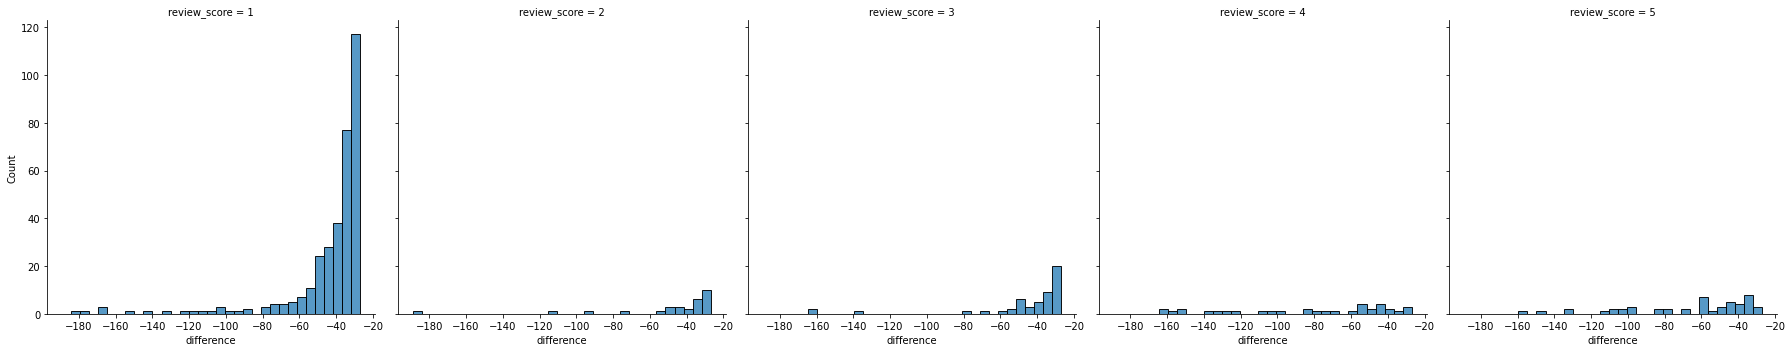

In [13]:
sns.displot(data=dfplot, x = 'difference', col='review_score')

In [14]:
df5 = dfplot.groupby('review_score').agg({'difference':'count'})

In [15]:
dfplot

,review_score,difference
55915,2,-189.0
19703,1,-182.0
11465,1,-176.0
81858,1,-168.0
89632,1,-167.0
...,...,...
34502,1,-27.0
61643,1,-27.0
19958,2,-27.0
84709,2,-27.0


In [176]:
dfplot2 = dfplot.groupby('difference').agg({'review_score' : 'count'})
dfplot2 = dfplot2.reset_index()
dfplot2

,difference,review_score
0,-189.0,1
1,-182.0,1
2,-176.0,1
3,-168.0,1
4,-167.0,1
...,...,...
85,-31.0,15
86,-30.0,39
87,-29.0,47
88,-28.0,40


In [17]:
type(dfplot2['review_score'][1])

numpy.float64

In [175]:
dfplot2.tail(15)

,difference,total de notes
75,-41.0,10
76,-40.0,6
77,-39.0,10
78,-38.0,9
79,-37.0,16
80,-36.0,25
81,-35.0,12
82,-34.0,20
83,-33.0,18
84,-32.0,26


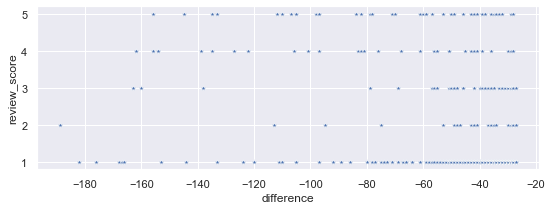

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import numpy as np

sns.set(rc={'figure.figsize':(9,3)})

ax = sns.scatterplot(x= 'difference', 
                      y = 'review_score', marker = '*',
                      data = df3)

In [151]:
dfplot2.rename(columns={'review_score': 'total de notes'}, inplace=True)
dfplot2.head(3)

,difference,total de notes
0,-189.0,1
1,-182.0,1
2,-176.0,1
